# 1. 불균형한 레이블 데이터 세트에서 정확도를 성능 수치로 사용해서는 안되는 이유?
정확도는 예측 결과와 실제 결과가 일치하는 자표로, 직관적으로 모델 예측 성능을 나타내는 평가지표이지만, 이진분류의 경우 데이터의 구성(한쪽의 데이터 수가 너무 많거나 적은 경우)에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지는 않는다.

# 2. 정밀도란?/정밀도가 중요 지표로 간주되는 경우
정밀도: 예측을 positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율 , TP / (FP+TP)

Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로, 예를 들어, 스팸메일 여부를 판단하는 경우, 실제로는 Negative 스팸 메일인데 Positive인 스팸 메일로 분류할 경우 업무에 차질이 생기는 일과 같이,
실제 Negative 데이터를 Positive로 판단하면 안되는 경우에 사용한다.

# 3. 재현율이란?/재현율이 중요 지표로 간주되는 경우
재현율: 실제 값이 Positive인 대상 중에 예측과 같이 실제 값이 Positive로 일치한 데이터의 비율, 민감도, TPR이라고도 불린다. TP / (FN + TP)

암 판단 모델과 보험 사기, 금융 사기 적발 모델과 같이,
실제 Positive인 데이터 예측을 Negative로 잘못하게되면 업무상 큰 영향이 발생하는 경우에 사용한다.

# 4. 아래 임계값이 다른 두 오차 행렬이 있다. 임계값이 더 높은 오차 행렬은 무엇인가?
# 임계값이 증가할 때 정밀도/재현율은 어떻게 변하는가?
a 정밀도: 약 86%, 재현율: 약 96%
b 정밀도: 약 91%, 재현율: 약 86%
임계값이 높을 수록 정밀도가 높아지고, 재현율은 작아지게 되므로 정밀도가 더 크고 재현율이 더 작은 b에서의 임계값이 더 큼을 알 수 있다. 

# 5. FPR이란?/임계값이 0, 1일때의 FPR?
FPR: False Positive Rate, ROC 곡선의 X 축 기준, FP / (FP+TN) = 1 - TNR(특이성, TN/(FP+TN))
임계값이 0인경우, TN이 0이 되어, FPR은 1이 된다.
임계값이 1인 경우, FP가 0이 되어, FPR은 0이 된다.


# 6. 아래 결정 트리 모델에 대하여
## 6-1 x = 3
## 6-2 x = 8
## 6-3 x= 3


# 7. 첨부된 데이터(심장병 예측 데이터)로 로지스틱 회귀를 이용해 예측 모델 생성 후 성능 수치가 좋은 적절한 임계값을 찾고 정확도/정밀도/재현율/F1 스코어/ROC AUC 값을 구하시오.
## (재현율/정밀도 곡선 그래프와, ROC 곡선 그래프도 그릴 것)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [10]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy=accuracy_score(y_test, pred)
    precision=precision_score(y_test, pred)
    recall=recall_score(y_test, pred)
    
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [16]:
X = heart_data.iloc[:, :-1]
y = heart_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 145, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[20  8]
 [ 2 31]]
정확도: 0.8361, 정밀도: 0.7949, 재현율: 0.9394, F1:0.8611, AUC:0.9134


C:\Users\1229j\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] # 레이블 값이 1일때의 예측 확률 축출

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
def precision_recall_curve_plot(y_test, pred_proba_c1):
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

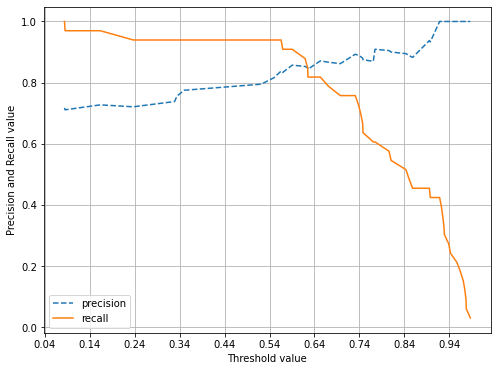

In [42]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

샘플 추출을 위한 임계값 배열의 index: [ 1  6 11 16]
샘플 index로 추출한 임곗값:  [0.99 0.77 0.63 0.16]
샘플 임곗값별 FPR:  [0.    0.071 0.179 0.429]
샘플 임곗값별 TPR:  [0.03  0.606 0.818 0.97 ]


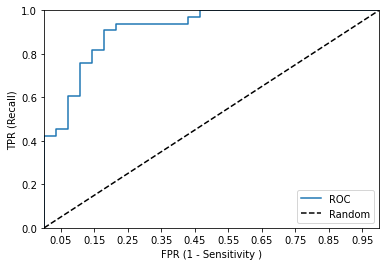

In [43]:
from sklearn.metrics import roc_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label = 'ROC')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1);plt.ylim(0, 1)
    plt.xlabel('FPR (1 - Sensitivity )');plt.ylabel('TPR (Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:, 1])

In [19]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
zero_features = ['oldpeak', 'ca', 'thal']
total_count = heart_data['oldpeak'].count()

for feature in zero_features:
    zero_count = heart_data[heart_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2}%'.format(feature, zero_count, 100*zero_count/total_count))

oldpeak 0 건수는 99, 퍼센트는 32.67326732673267%
ca 0 건수는 175, 퍼센트는 57.755775577557756%
thal 0 건수는 2, 퍼센트는 0.6600660066006601%


In [22]:
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [39]:
thresholds_2 = np.arange(0.5, 0.6, 0.01)
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds_2)

## 임계값 0.56 vs 0.59일때 최고

임계값:  0.5
오차행렬
[[20  8]
 [ 2 31]]
정확도: 0.8361, 정밀도: 0.7949, 재현율: 0.9394, F1:0.8611, AUC:0.9134
임계값:  0.51
오차행렬
[[20  8]
 [ 2 31]]
정확도: 0.8361, 정밀도: 0.7949, 재현율: 0.9394, F1:0.8611, AUC:0.9134
임계값:  0.52
오차행렬
[[20  8]
 [ 2 31]]
정확도: 0.8361, 정밀도: 0.7949, 재현율: 0.9394, F1:0.8611, AUC:0.9134
임계값:  0.53
오차행렬
[[21  7]
 [ 2 31]]
정확도: 0.8525, 정밀도: 0.8158, 재현율: 0.9394, F1:0.8732, AUC:0.9134
임계값:  0.54
오차행렬
[[21  7]
 [ 2 31]]
정확도: 0.8525, 정밀도: 0.8158, 재현율: 0.9394, F1:0.8732, AUC:0.9134
임계값:  0.55
오차행렬
[[22  6]
 [ 2 31]]
정확도: 0.8689, 정밀도: 0.8378, 재현율: 0.9394, F1:0.8857, AUC:0.9134
임계값:  0.56
오차행렬
[[22  6]
 [ 2 31]]
정확도: 0.8689, 정밀도: 0.8378, 재현율: 0.9394, F1:0.8857, AUC:0.9134
임계값:  0.5700000000000001
오차행렬
[[23  5]
 [ 3 30]]
정확도: 0.8689, 정밀도: 0.8571, 재현율: 0.9091, F1:0.8824, AUC:0.9134
임계값:  0.5800000000000001
오차행렬
[[23  5]
 [ 3 30]]
정확도: 0.8689, 정밀도: 0.8571, 재현율: 0.9091, F1:0.8824, AUC:0.9134
임계값:  0.5900000000000001
오차행렬
[[23  5]
 [ 3 30]]
정확도: 0.8689, 정밀도: 0.8571, 재현율: 0.9091, F1:0.8824, AUC:0.9134

In [34]:
# 임계값을 0.56으로

binarizer = Binarizer(threshold=0.56)
pred_th_056 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_056, pred_proba[:, 1])

오차행렬
[[22  6]
 [ 2 31]]
정확도: 0.8689, 정밀도: 0.8378, 재현율: 0.9394, F1:0.8857, AUC:0.9134


In [35]:
# 임계값을 0.59로

binarizer = Binarizer(threshold=0.59)
pred_th_059 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_059, pred_proba[:, 1])

오차행렬
[[23  5]
 [ 3 30]]
정확도: 0.8689, 정밀도: 0.8571, 재현율: 0.9091, F1:0.8824, AUC:0.9134


## 임계값을 0.53~0.56 으로 설정 -> 정확도: 0.8689, 정밀도: 0.8378, 재현율: 0.9394, F1:0.8857, AUC:0.9134 (F1이 더 크고 정밀도가 조금 작다.)
## 임계값을 0.57~0.59 로 설정 -> 정확도: 0.8689, 정밀도: 0.8571, 재현율: 0.9091, F1:0.8824, AUC:0.9134 (F1이 조금 작고 정밀도가 조금 크다.)